# Compara nodos para saber cuál es el que presenta los mejores datos para cada valriable y a qué periodos de medición corresponden

### Importa módulos necesarios y establece configuraciones

In [1]:
import pandas as pd
from time import time
import matplotlib.pyplot as plt
import pandas as pd
import funs
from IPython.display import display
import numpy as np
import seaborn as sns
import plotly.plotly as py
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
pd.options.display.float_format = '{:.2f}'.format

### Lee los nodos en un diccionario de dataframes

In [2]:
tablas={}
for nodo in [2,3,4,5,6,8]:
    tablas[nodo] = pd.read_csv('medidas_nodo%s.csv'%nodo,parse_dates=True,index_col=0)

### Grafica los valores de las variables de cada nodo en gráficas interactivas

for nodo in [2,3,4,5,6,8]:
    data = ([{'x': tablas[nodo].index,'y': tablas[nodo][col],'name': col}
             for col in tablas[nodo].columns[0:4]])
    layout = dict(title = 'NODO %s' %nodo,
                  yaxis = dict(title = '°C, %RH, %Pw, Nivel UV'),
                  xaxis = dict(title = 'FECHA')
                 )
    fig = dict(data=data, layout=layout)
    iplot(fig,layout)

### Aplica funs.separa: obtine para cada nodo una lista de DF con los registros obtenidos entre periodos de medición con separación de más de t minutos

In [3]:
# Aplica la función separa_nodos, que calcula el tamaño de los dataframes entre periodos.
# Los periodos de medición corresponden a una separación entre registros  mayor a t minutos.
# t = 60*24, los registros se realizan cada minuto, de modo que t equivale a un día.
t = 60 * 24
nodo, periodos = {}, {}
for i in [2,3,4,5,6,8]:
    nodo[i], periodos[i] = funs.separa_datos(tablas[i],t)

### Presenta información acerca de los periodos de medición

In [4]:
for i in periodos:
    print('\nNodo %s'%i)
    
    print('\n',periodos[i].iloc[:,[0,1,2,4]])


Nodo 2

      Registro Inicial      Registro Final  Registrado  Registrado(%)
0 2018-05-09 09:38:00 2018-05-10 14:38:00        1722          98.91
1 2018-05-23 09:22:00 2018-05-26 07:01:00        4135          98.92
2 2018-06-05 10:11:00 2018-06-09 15:24:00        5138          84.59
3 2018-06-11 08:51:00 2018-06-11 09:17:00          27         100.00

Nodo 3

      Registro Inicial      Registro Final  Registrado  Registrado(%)
0 2018-05-09 09:49:00 2018-05-10 14:38:00        1708          98.73
1 2018-05-23 09:59:00 2018-05-28 22:32:00        7931          99.71
2 2018-06-05 10:15:00 2018-06-08 18:40:00        4677          96.91
3 2018-06-11 08:56:00 2018-06-11 09:17:00          22         100.00

Nodo 4

      Registro Inicial      Registro Final  Registrado  Registrado(%)
0 2018-05-09 10:36:00 2018-05-09 14:06:00         186          88.15
1 2018-05-23 10:22:00 2018-05-24 10:17:00         204          14.21

Nodo 5

      Registro Inicial      Registro Final  Registrado  Registra

### Aplica un filtro a los registros, cualquier periodo de medición con menos de mr registros es eliminado

In [5]:
# mr es la cantidad mínima de registros
mr = 1e3
for i in periodos:
    borrar =[]
    for j in periodos[i].index:
        if periodos[i].iloc[j,2] < mr:
            borrar.append(j)
            nodo[i][j]=np.nan
    periodos[i] = periodos[i].drop(index=borrar)
    nodo[i] = [nodo[i][x] for x in periodos[i].index if not(x in borrar)]

### Presenta la información relacionada a los periodos de medición para cada nodo luego de applicado el filtro de cantidad de registros

In [6]:
for i in periodos:
    display('Nodo %s'%i,periodos[i])

'Nodo 2'

,Registro Inicial,Registro Final,Registrado,No Registrado,Registrado(%),No Registrado(%),Duración,Tiempo Hasta el Siguiente Registro
0,2018-05-09 09:38:00,2018-05-10 14:38:00,1722,19,98.91,1.09,1 days 05:00:00,12 days 18:44:00
1,2018-05-23 09:22:00,2018-05-26 07:01:00,4135,45,98.92,1.08,2 days 21:39:00,10 days 03:10:00
2,2018-06-05 10:11:00,2018-06-09 15:24:00,5138,936,84.59,15.41,4 days 05:13:00,1 days 17:27:00


'Nodo 3'

,Registro Inicial,Registro Final,Registrado,No Registrado,Registrado(%),No Registrado(%),Duración,Tiempo Hasta el Siguiente Registro
0,2018-05-09 09:49:00,2018-05-10 14:38:00,1708,22,98.73,1.27,1 days 04:49:00,12 days 19:21:00
1,2018-05-23 09:59:00,2018-05-28 22:32:00,7931,23,99.71,0.29,5 days 12:33:00,7 days 11:43:00
2,2018-06-05 10:15:00,2018-06-08 18:40:00,4677,149,96.91,3.09,3 days 08:25:00,2 days 14:16:00


'Nodo 4'

,Registro Inicial,Registro Final,Registrado,No Registrado,Registrado(%),No Registrado(%),Duración,Tiempo Hasta el Siguiente Registro


'Nodo 5'

,Registro Inicial,Registro Final,Registrado,No Registrado,Registrado(%),No Registrado(%),Duración,Tiempo Hasta el Siguiente Registro
0,2018-05-09 10:25:00,2018-05-10 14:37:00,1674,19,98.88,1.12,1 days 04:12:00,12 days 19:31:00
1,2018-05-23 10:08:00,2018-05-26 08:34:00,4203,24,99.43,0.57,2 days 22:26:00,10 days 01:47:00
2,2018-06-05 10:21:00,2018-06-11 09:17:00,5888,2689,68.65,31.35,5 days 22:56:00,0 days 00:00:00


'Nodo 6'

,Registro Inicial,Registro Final,Registrado,No Registrado,Registrado(%),No Registrado(%),Duración,Tiempo Hasta el Siguiente Registro
0,2018-05-09 09:38:00,2018-05-10 14:38:00,1620,121,93.05,6.95,1 days 05:00:00,12 days 19:05:00


'Nodo 8'

,Registro Inicial,Registro Final,Registrado,No Registrado,Registrado(%),No Registrado(%),Duración,Tiempo Hasta el Siguiente Registro
0,2018-05-24 09:41:00,2018-05-29 07:35:00,6439,636,91.01,8.99,4 days 21:54:00,7 days 03:02:00
1,2018-06-05 10:37:00,2018-06-09 16:32:00,1922,4194,31.43,68.57,4 days 05:55:00,1 days 01:01:00


#### Se evidencian tres periodos de medición para los cuales hay registros de los nodos 2, 3, 5, 6 y 8

#### A continuación se presentan las gráficas de las variables durante tres periodos de medición. 
### Gráfica para el primer periodo

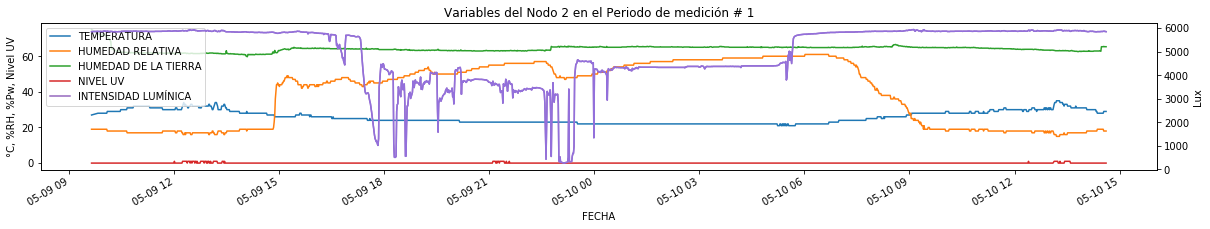

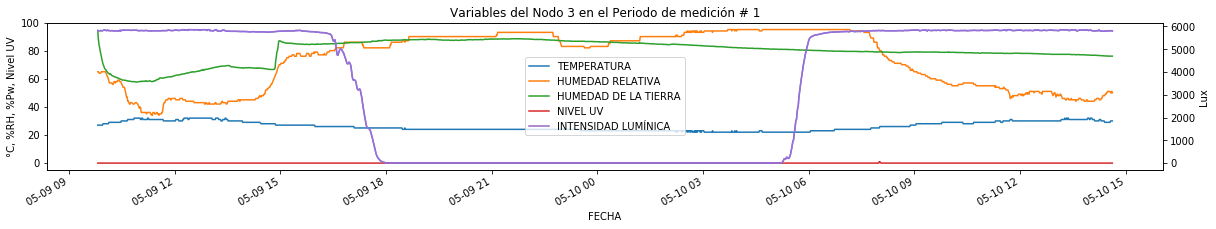

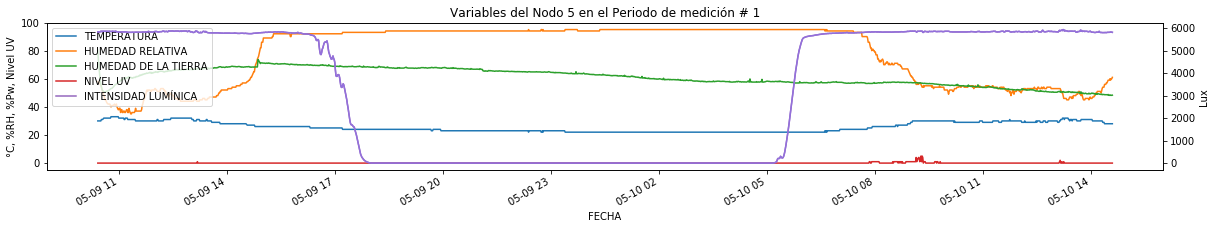

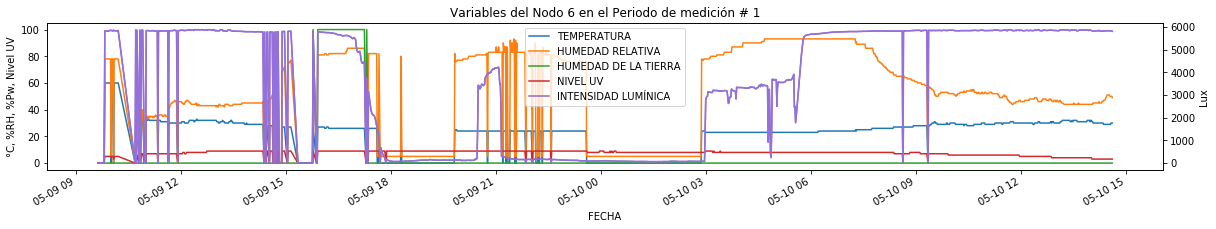

In [7]:
T = 0
for i in [2,3,5,6]:
    ax=nodo[i][T].iloc[:,0:5].plot(figsize=[20,3],
                                  secondary_y='INTENSIDAD LUMÍNICA'
                                  ,mark_right=None)
    ax2=nodo[i][T].iloc[:,4].plot(secondary_y=True,color='mediumpurple')
    ax.set_ylabel('°C, %RH, %Pw, Nivel UV')
    ax2.set_ylabel('Lux')
    ax.set_xlabel('FECHA')
    ax.set_title('Variables del Nodo %d en el Periodo de medición # %d'%(i,T+1))
plt.show()

#### Para el primer periodo los registros de los nodos 2, 3 y 5 presentan gran similitud, tanto para los valores medidos de cada variable como para el rango de fechas de los registros, se eceptúa el caso del sensor de PT550 del nodo 2, durante horarios nocturnos están erradas, sea por falla en el sensor o por alguna fuente de luz presente en su cercanía durante la noche correspondiente a los registros.
#### En los registros del nodo 6 se puede evidenciar que el nodo presentó fallas en diferentes momentos:
- Se observan periodos de hasta tres horas sin registrar datos de las variables Humedad Relativa y Temperatura, correspondientes al sensor DHT11.
- Se observa que los valores de la variable Nivel UV permanencen constantes durante todo el periodo de medición, registrando una media de 7.52, lo que indica que este sensor se encontraba defectuoso.
- La media de los valores de Humedad de la tierra registrados es de 5.14, lo que indica que este sensor podría estar defectuoso o desconectado.
### Gráfica para el segundo periodo

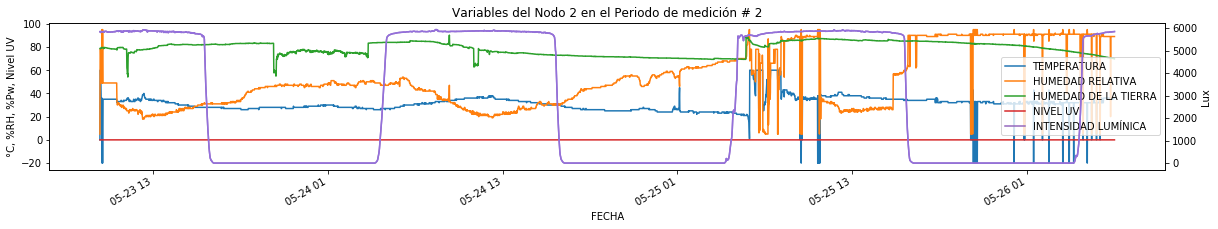

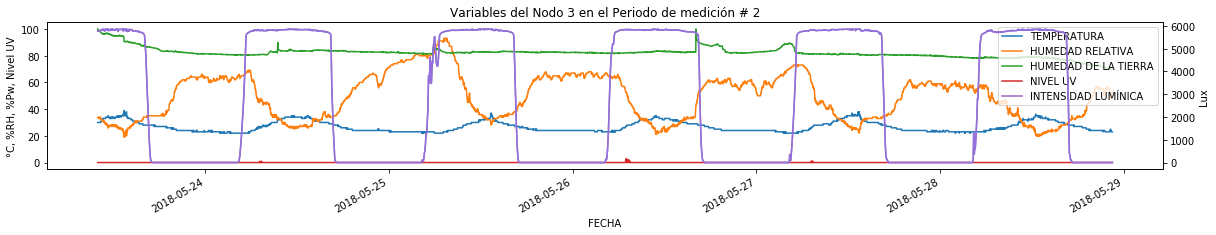

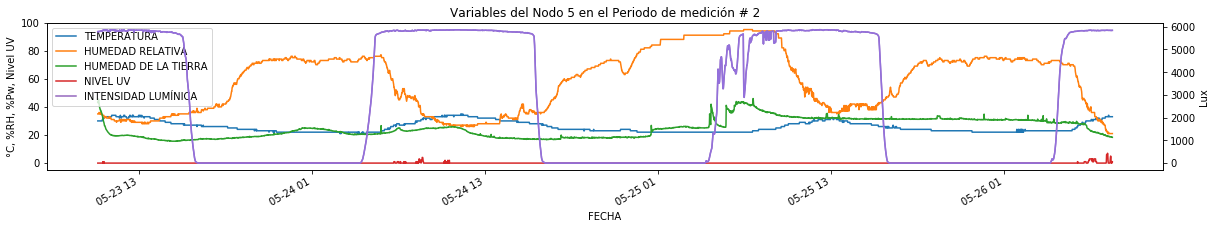

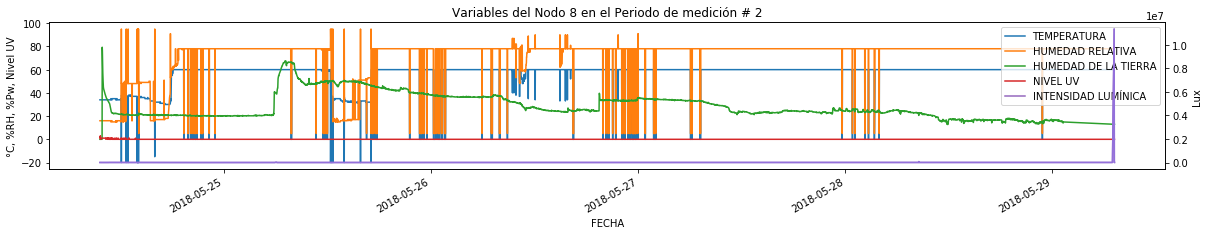

In [8]:
T = 1
for i in [2,3,5]:
    ax=nodo[i][T].iloc[:,0:5].plot(figsize=[20,3],
                                  secondary_y='INTENSIDAD LUMÍNICA'
                                  ,mark_right=None)
    ax2=nodo[i][T].iloc[:,4].plot(secondary_y=True,color='mediumpurple')
    ax.set_ylabel('°C, %RH, %Pw, Nivel UV')
    ax2.set_ylabel('Lux')
    ax.set_xlabel('FECHA')
    ax.set_title('Variables del Nodo %d en el Periodo de medición # %d'%(i,T+1))
    
ax=nodo[8][0].iloc[:,0:5].plot(figsize=[20,3],
                               secondary_y='INTENSIDAD LUMÍNICA'
                               ,mark_right=None)
ax2=nodo[8][0].iloc[:,4].plot(secondary_y=True,color='mediumpurple')
ax.set_ylabel('°C, %RH, %Pw, Nivel UV')
ax2.set_ylabel('Lux')
ax.set_xlabel('FECHA')
ax.set_title('Variables del Nodo 8 en el Periodo de medición # 2')
plt.show()

#### Durante el segundo periodo de medición se presentaron fallas simultaneas en el sensor DTH11 del nodo 2 y variaciones anormales  en los registros de intensidad lumínica de los nodos 2, 3 y 5 crrespondientes a la mañana del 25 de mayo.
- Las diferencias respecto a los valores medidos en los nodos 2, 3 y 5 aunmentan en comparación a lo observado en el periodo de medición # 1.
#### El nodo 8 presentó fallas en todos sus sensores, salvo el orrespondiente a Humedad de la Tierra.

### Gráfica para el tercer periodo

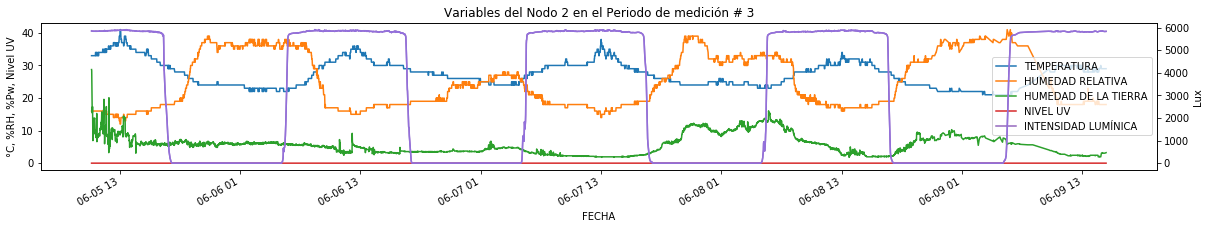

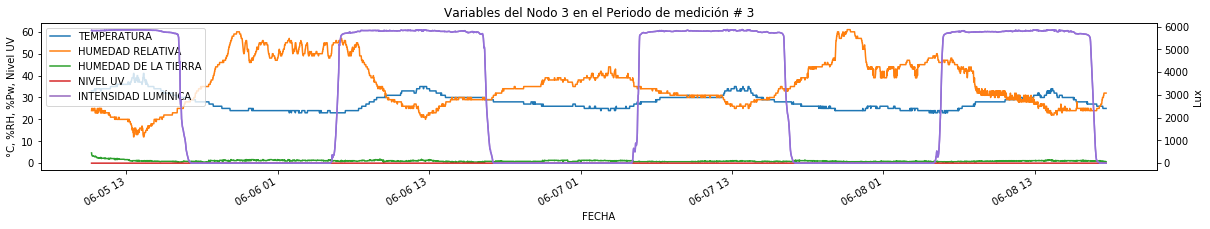

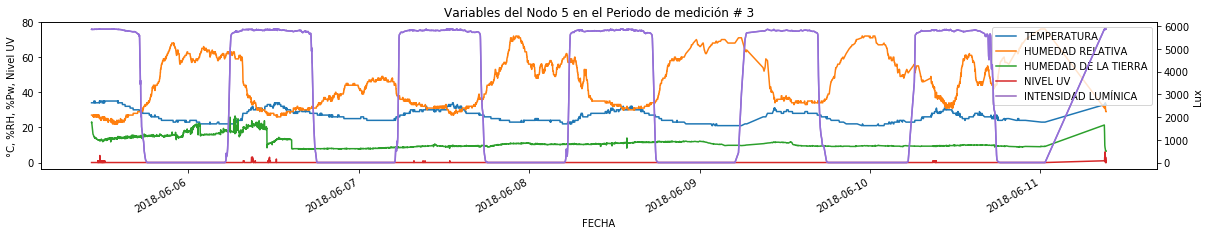

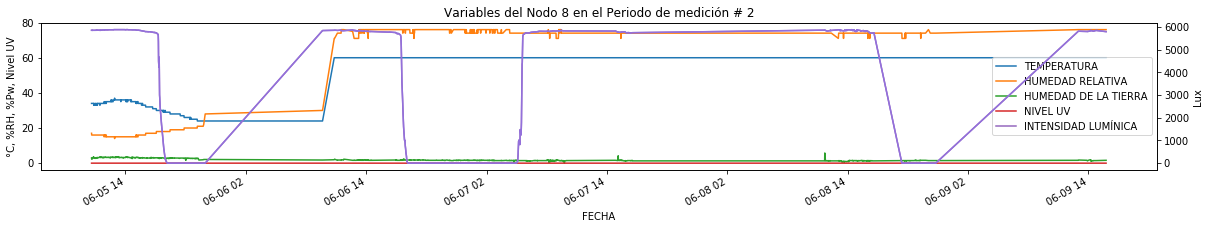

In [9]:
T = 2
for i in [2,3,5]:
    ax=nodo[i][T].iloc[:,0:5].plot(figsize=[20,3],
                                  secondary_y='INTENSIDAD LUMÍNICA'
                                  ,mark_right=None)
    ax2=nodo[i][T].iloc[:,4].plot(secondary_y=True,color='mediumpurple')
    ax.set_ylabel('°C, %RH, %Pw, Nivel UV')
    ax2.set_ylabel('Lux')
    ax.set_xlabel('FECHA')
    ax.set_title('Variables del Nodo %d en el Periodo de medición # %d'%(i,T+1))
    
ax=nodo[8][1].iloc[:,0:5].plot(figsize=[20,3],
                               secondary_y='INTENSIDAD LUMÍNICA'
                               ,mark_right=None)
ax2=nodo[8][1].iloc[:,4].plot(secondary_y=True,color='mediumpurple')
ax.set_ylabel('°C, %RH, %Pw, Nivel UV')
ax2.set_ylabel('Lux')
ax.set_xlabel('FECHA')
ax.set_title('Variables del Nodo 8 en el Periodo de medición # 2')
plt.show()

#### Durante el tercer periodo de medición se presentaron las mayores similitudes entre las variables registradas en los nodos 2, 3 y 5.
- Los bajos niveles de humedad del suelo en todos los nodos corresponden a que han transcurrido varios días desde que se regó el cultivo por última vez y al redución de las precipitaciones en la región.

#### Los sensores de Temperatura, humedad relativa e intensidad lumínica comenzaron a fallar despues de aproximadamente seis horas de funcionamiento, las fallas se mantuvieron hasta el final del periodo de medición.

##### A partir de la información anterior se establece que los nodos 6 y 8 no aportan información útil para el análisis de los datos, pues se evidencian demasiadas fallas en los valores. Además, se puede establecer que hay tres periodos de medición para los cuales se tienen registros simultaneos de los nodos 2, 3 y 5. 
- La variable Nivel UV no se va a considerar para el estudio, dado que la cantidad de valores medidos que corresponden a la incidencia de radiación solar directamente sobre los sensores se presentan en un reducido espacio de tiempo durante los días de medición, esto corresponde a la ubicación de los sensores a la altura de los frutos de cacao.

#### A continuación se procede a igualar los registros para los tres nodos teniendo en cuenta los siguientes rangos:
- Periodo 1: 2018-05-09 10:25:00 - 2018-05-10 14:38:00
- Periodo 2: 2018-05-23 10:08:00 - 2018-05-26 07:01:00
- Periodo 3: 2018-06-05 10:21:00 - 2018-06-08 18:40:00

### Se definen las fechas en las que inician y terminan los periodos de medición

In [10]:
inicio = {0: '2018-05-09 10:25:00',
          1: '2018-05-23 10:08:00',
          2: '2018-06-05 10:21:00'}
fin = {0: '2018-05-10 14:38:00',
       1: '2018-05-26 07:01:00',
       2: '2018-06-08 18:40:00'}

### Se extraen los rangos definidos para cada periodo de medición

In [11]:
node = {2:[], 3:[], 5:[]}
info = {2:[], 3:[], 5:[]}
for i in [2,3,5]:
    node[i]={}
    info[i]=pd.DataFrame(columns=['Registro Inicial', 'Registro Final',
                                  'Registrado', 'No Registrado',
                                  'Registrado(%)', 'No Registrado(%)','Duración'])
    for T in range(3):
        node[i][T], infon = funs.info_periodo(nodo[i][T],inicio[T],fin[T])
        node[i][T] = node[i][T].drop(columns=['NIVEL UV'])
        info[i] = pd.concat([info[i],infon])
    info[i] = info[i].reset_index(drop=True)    

In [12]:
for i in [2,3,5]:
    display('Nodo %d'%i,info[i])

'Nodo 2'

,Registro Inicial,Registro Final,Registrado,No Registrado,Registrado(%),No Registrado(%),Duración
0,2018-05-09 10:25:00,2018-05-10 14:38:00,1685,9,99.47,0.53,1 days 04:13:00
1,2018-05-23 10:08:00,2018-05-26 07:01:00,4093,41,99.01,0.99,2 days 20:53:00
2,2018-06-05 10:21:00,2018-06-08 18:40:00,4633,187,96.12,3.88,3 days 08:19:00


'Nodo 3'

,Registro Inicial,Registro Final,Registrado,No Registrado,Registrado(%),No Registrado(%),Duración
0,2018-05-09 10:25:00,2018-05-10 14:38:00,1672,22,98.70,1.30,1 days 04:13:00
1,2018-05-23 10:08:00,2018-05-26 07:01:00,4123,11,99.73,0.27,2 days 20:53:00
2,2018-06-05 10:21:00,2018-06-08 18:40:00,4671,149,96.91,3.09,3 days 08:19:00


'Nodo 5'

,Registro Inicial,Registro Final,Registrado,No Registrado,Registrado(%),No Registrado(%),Duración
0,2018-05-09 10:25:00,2018-05-10 14:38:00,1674,20,98.82,1.18,1 days 04:13:00
1,2018-05-23 10:08:00,2018-05-26 07:01:00,4111,23,99.44,0.56,2 days 20:53:00
2,2018-06-05 10:21:00,2018-06-08 18:40:00,4611,209,95.66,4.34,3 days 08:19:00


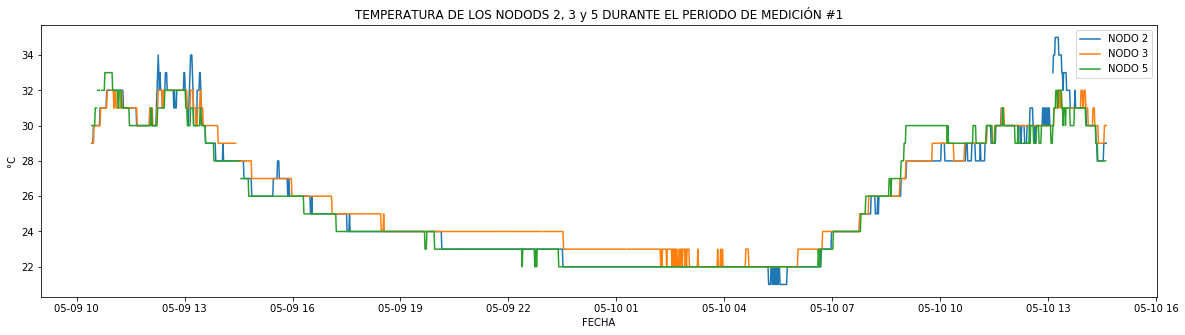

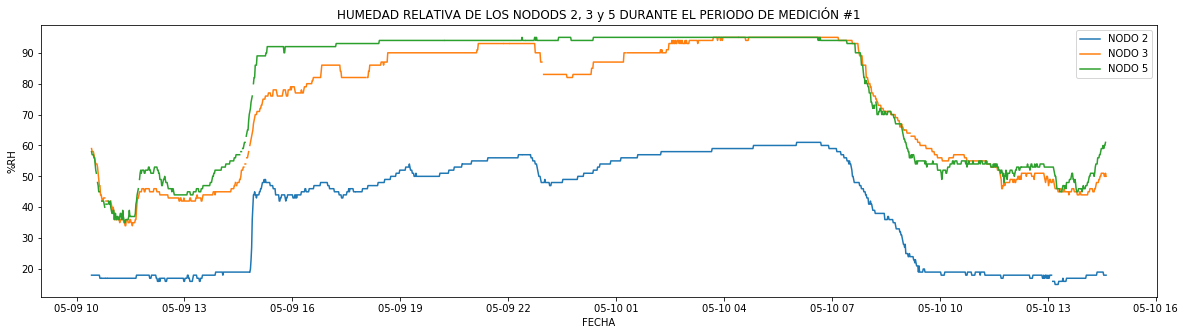

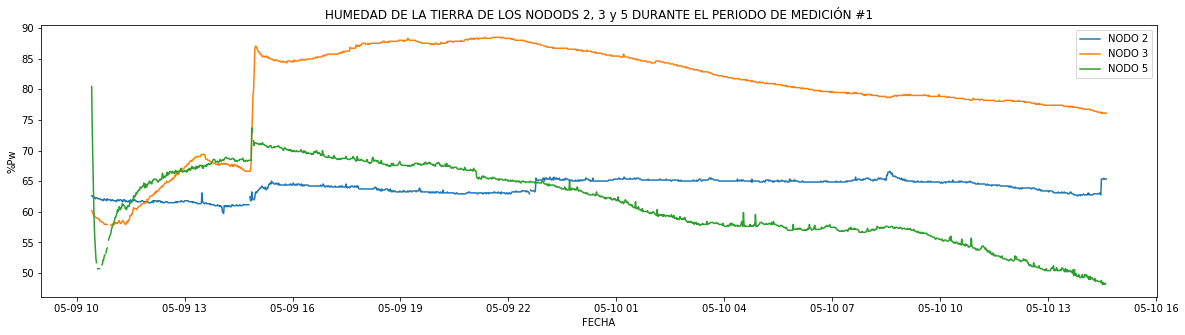

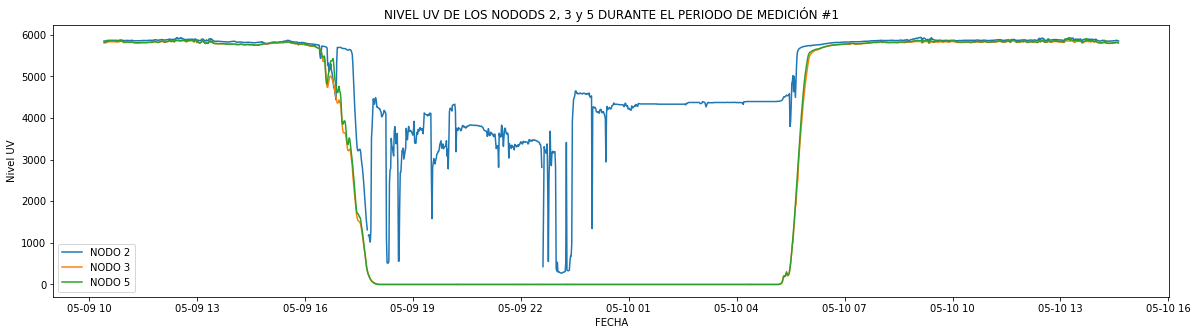

In [13]:
# Presenta los registros del segundo periodo de medición de los nodos 2, 3 y 5 
T = 0
mag = {0:'°C', 1:'%RH', 2:'%Pw', 3:'Nivel UV', 4:'lx'}
for i in range(4):
    plt.figure(figsize=[20,5])
    plt.title('%s DE LOS NODODS 2, 3 y 5 DURANTE EL PERIODO DE MEDICIÓN #%d'%(nodo[2][0].columns[i],T+1))
    plt.xlabel('FECHA')
    plt.ylabel(mag[i])
    plt.plot(node[2][0].iloc[:,i].asfreq('60S'),label='NODO 2')
    plt.plot(node[3][0].iloc[:,i].asfreq('60S'),label='NODO 3')
    plt.plot(node[5][0].iloc[:,i].asfreq('60S'),label='NODO 5')
    plt.legend()

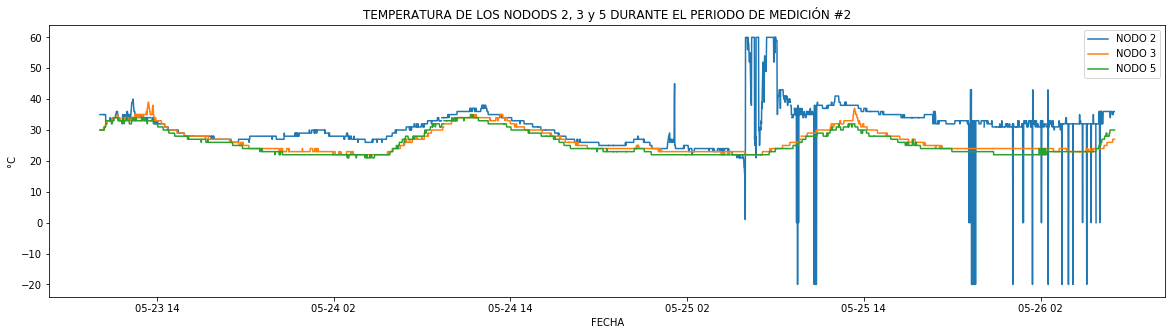

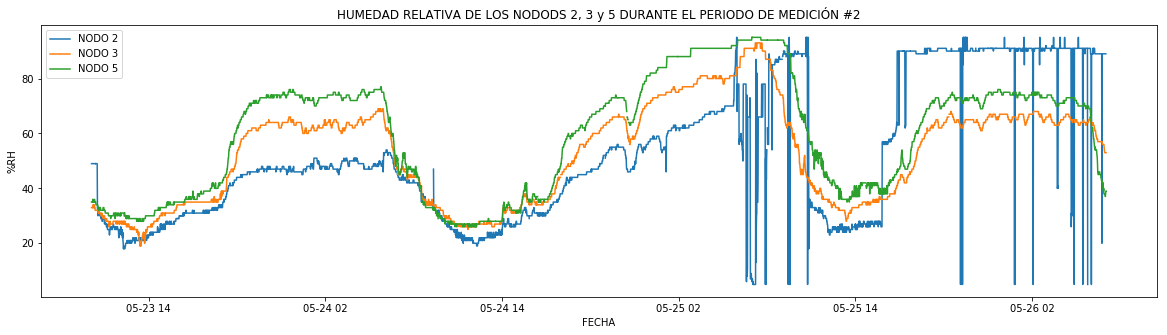

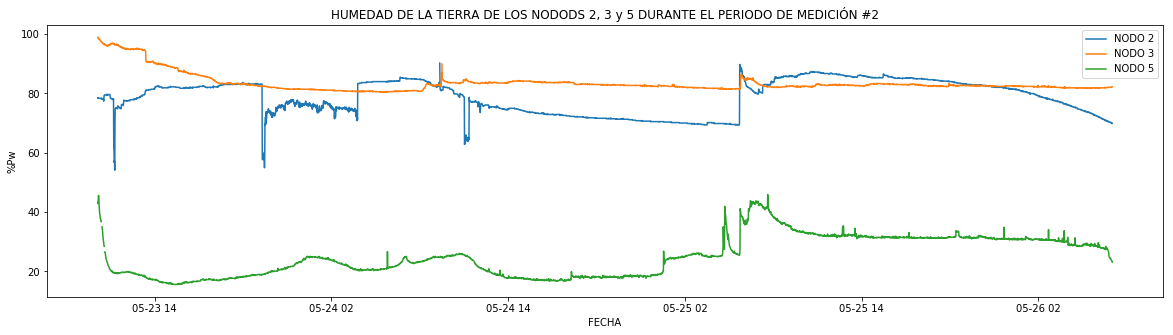

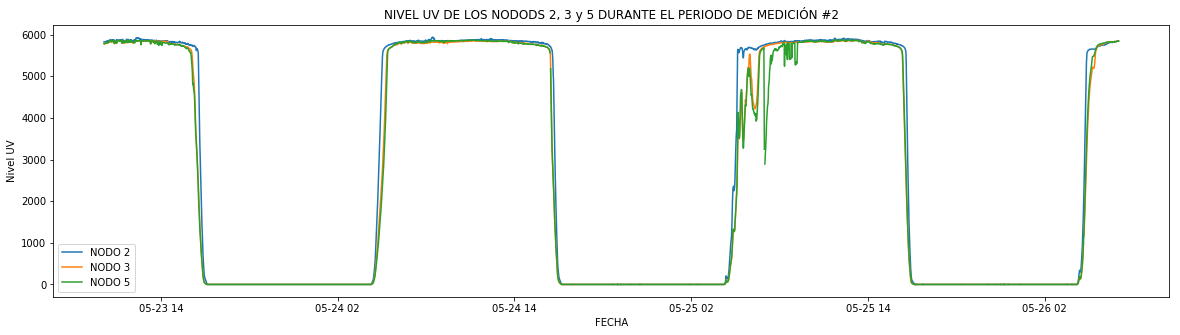

In [14]:
# Presenta los registros del segundo periodo de medición de los nodos 2, 3 y 5 
T = 1
mag = {0:'°C', 1:'%RH', 2:'%Pw', 3:'Nivel UV', 4:'lx'}
for i in range(4):
    plt.figure(figsize=[20,5])
    plt.title('%s DE LOS NODODS 2, 3 y 5 DURANTE EL PERIODO DE MEDICIÓN #%d'%(nodo[2][0].columns[i],T+1))
    plt.xlabel('FECHA')
    plt.ylabel(mag[i])
    plt.plot(node[2][T].iloc[:,i].asfreq('60S'),label='NODO 2')
    plt.plot(node[3][T].iloc[:,i].asfreq('60S'),label='NODO 3')
    plt.plot(node[5][T].iloc[:,i].asfreq('60S'),label='NODO 5')
    plt.legend()

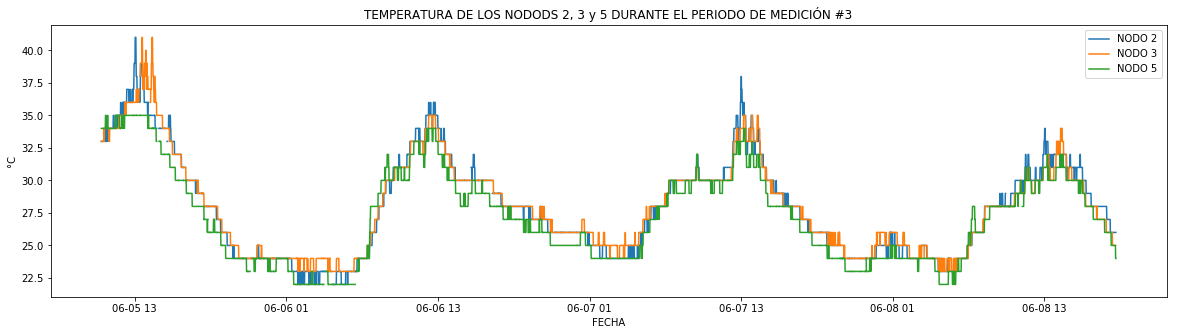

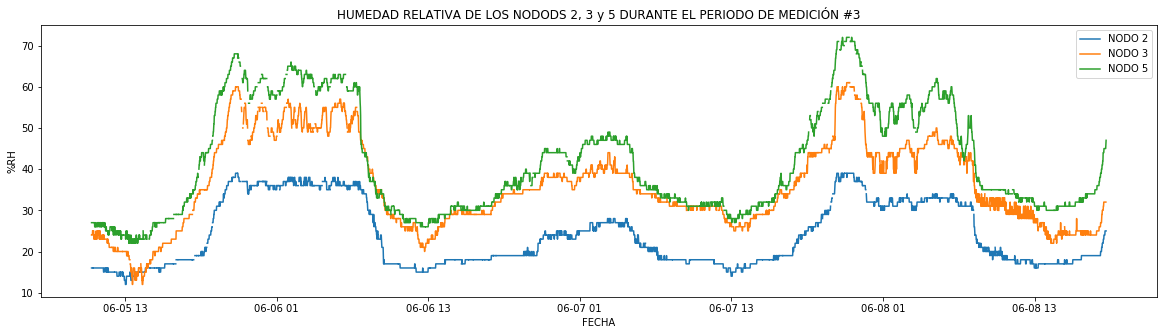

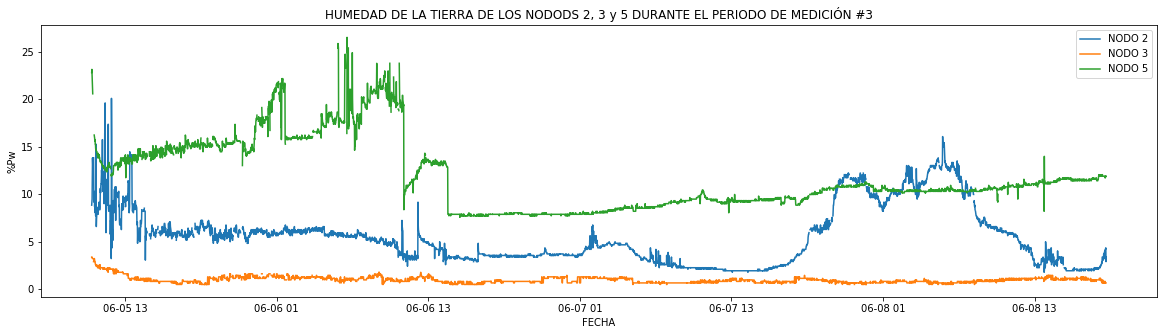

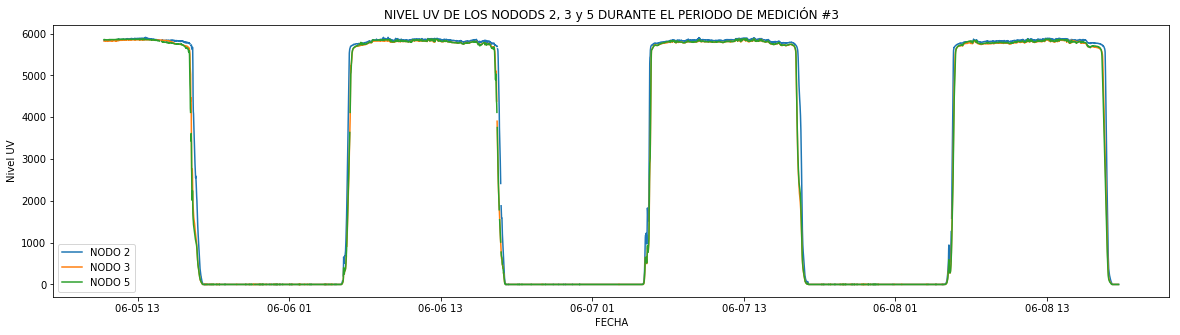

In [15]:
# Presenta los registros del tercer periodo de los nodos 2, 3 y 5 
T = 2
mag = {0:'°C', 1:'%RH', 2:'%Pw', 3:'Nivel UV', 4:'lx'}
for i in range(4):
    plt.figure(figsize=[20,5])
    plt.title('%s DE LOS NODODS 2, 3 y 5 DURANTE EL PERIODO DE MEDICIÓN #%d'%(nodo[2][0].columns[i],T+1))
    plt.xlabel('FECHA')
    plt.ylabel(mag[i])
    plt.plot(node[2][T].iloc[:,i].asfreq('60S'),label='NODO 2')
    plt.plot(node[3][T].iloc[:,i].asfreq('60S'),label='NODO 3')
    plt.plot(node[5][T].iloc[:,i].asfreq('60S'),label='NODO 5')
    plt.legend()

In [16]:
for i in node:
    for T in range(3):
        node[i][T] = node[i][T].asfreq('60S')
        node[i][T] = upsampled.interpolate(method='nearest')

NameError: name 'upsampled' is not defined

In [ ]:
for i in node:
    for T in range(3):
        
        (node[i][T]).to_csv('nodo%d_periodo%d.csv'%(i, T+1))